In [1]:
from clean_data import *

# 10-100

In [2]:
d = load_data(10, 100)
d['CLEAN About the game'] = clean_text(d)
d_tfidf = tfidf(d['CLEAN About the game'], (3,3), 0.001)

d = d.join(d_tfidf)
train_cols = [col for col in d.columns[20:] if col != 'CLEAN About the game']

In [3]:
top_words(d)

     Review Class                   word     tfidf
127             0   first person shooter  0.009466
63              0        day night cycle  0.006950
356             0     single player mode  0.006829
123             0    first person horror  0.006470
2               0  action adventure game  0.006147
     Review Class                     word     tfidf
855             1        turn based combat  0.007546
577             1  full controller support  0.007468
544             1        fast paced action  0.006828
763             1    point click adventure  0.006393
797             1   single player campaign  0.005387


In [4]:
print('n = ', len(d), ' with ', np.around(d['Review Class'].value_counts()[1]/len(d) * 100, 1), '\% Positive class', sep = "")

n = 16937 with 64.7\% Positive class


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(d[train_cols])

ps = pca.transform(d[train_cols])

print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.41835862465849066
[0.17404475 0.13012966 0.11418422]


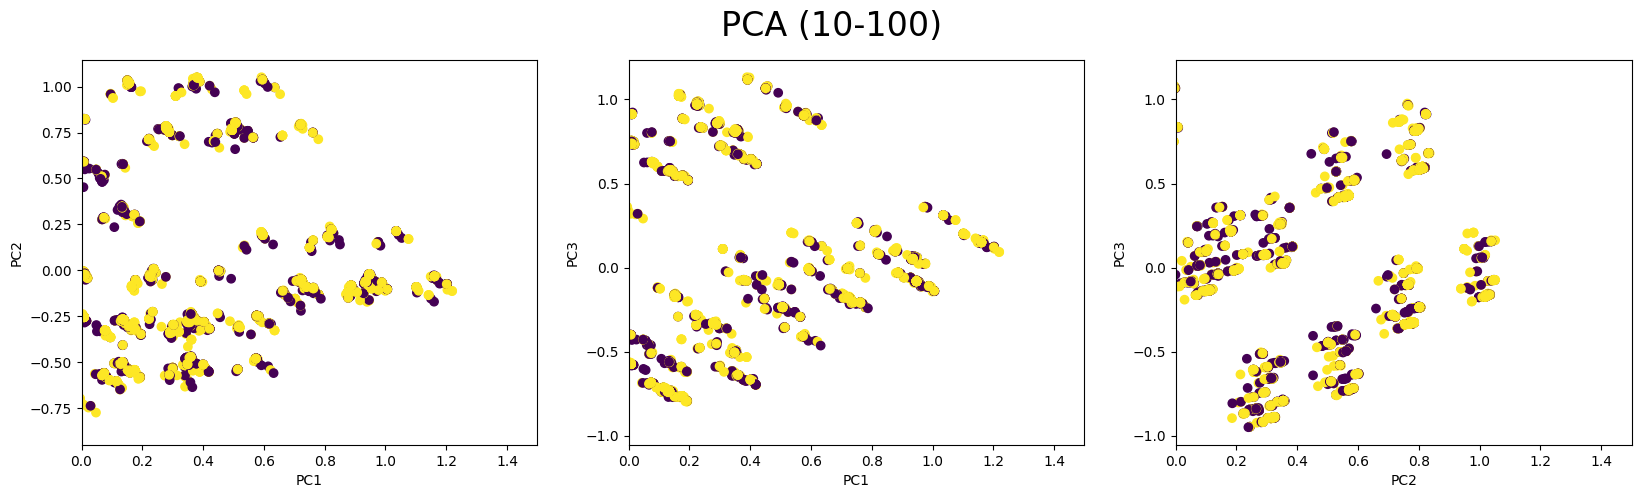

In [6]:
fig, ax = plt.subplots(figsize = (20, 5), nrows = 1, ncols = 3)

ax[0].scatter(ps[:, 0], ps[:, 1], c = d['Review Class'])
ax[0].set_xlim(0,1.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].scatter(ps[:, 0], ps[:, 2], c = d['Review Class'])
ax[1].set_xlim(0,1.5)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

ax[2].scatter(ps[:, 1], ps[:, 2], c = d['Review Class'])
ax[2].set_xlim(0,1.5)
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')

fig.suptitle('PCA (10-100)', fontsize = 24)

plt.show()

## modeling

In [7]:
from modeling import *

print('spectral')
spectral(d, train_cols)

print('kmeans')
kmeans(d, train_cols)

print('rf')
rf = rfm(d, train_cols)

print('xgb')
xgbc = xgbm(d, train_cols)

spectral
Accuracy: 48.93%
[[3013 2974]
 [5676 5274]]
Precision 0: 50.33%
Precision 1: 48.16%
Recall 0: 34.68%
Recall 1: 63.94%


kmeans


C:\Users\Almat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 52.31%
[[2908 3079]
 [4999 5951]]
Precision 0: 48.57%
Precision 1: 54.35%
Recall 0: 36.78%
Recall 1: 65.90%


rf
Accuracy: 64.11%
[[ 417 1389]
 [ 435 2841]]
Precision 0: 23.09%
Precision 1: 86.72%
Recall 0: 48.94%
Recall 1: 67.16%


xgb
Accuracy: 63.11%
[[ 608 1198]
 [ 677 2599]]
Precision 0: 33.67%
Precision 1: 79.33%
Recall 0: 47.32%
Recall 1: 68.45%




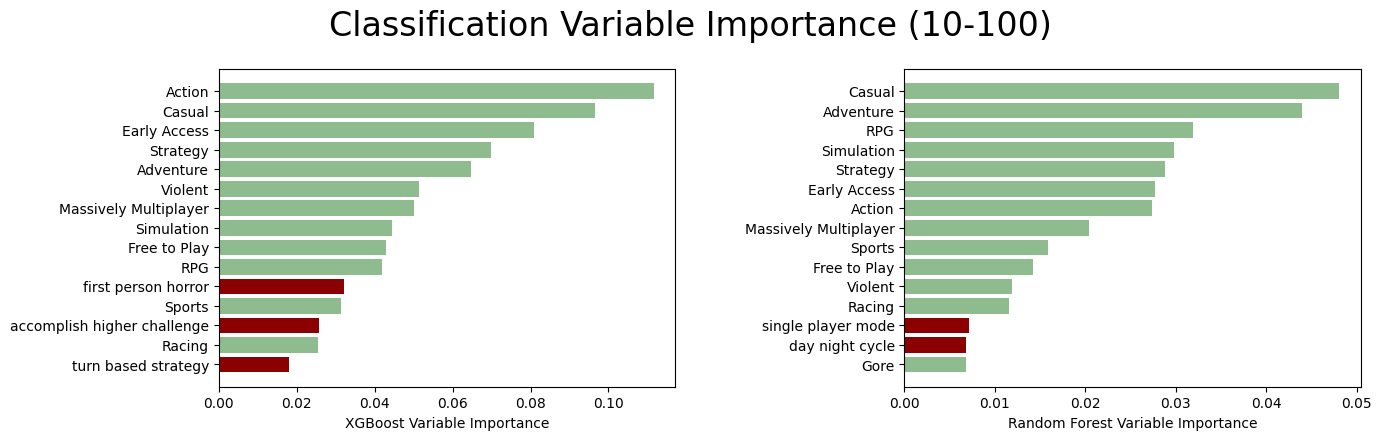

In [8]:
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 2)

# xgb
sorted_idx = (xgbc.feature_importances_).argsort()[-15:]

fi = xgbc.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[0].barh(fs, fi, color = cs)
ax[0].set_xlabel("XGBoost Variable Importance")

# rf
sorted_idx = (rf.feature_importances_).argsort()[-15:]

fi = rf.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[1].barh(fs, fi, color = cs)
ax[1].set_xlabel("Random Forest Variable Importance")

fig.tight_layout(pad = 5)
fig.suptitle('Classification Variable Importance (10-100)', fontsize = 24)
# plt.savefig('vi-10-100.png')
plt.show()

# 100 - 1000

In [9]:
d = load_data(101, 1000)
d['CLEAN About the game'] = clean_text(d)
d_tfidf = tfidf(d['CLEAN About the game'], (3,3), 0.001)

d = d.join(d_tfidf)

train_cols = [col for col in d.columns[20:] if col != 'CLEAN About the game']

In [10]:
top_words(d)

     Review Class                    word     tfidf
136             0    first person shooter  0.013847
63              0         day night cycle  0.010250
347             0      real time strategy  0.010146
431             0       turn based combat  0.009975
367             0  single player campaign  0.007648
     Review Class                     word     tfidf
813             1    point click adventure  0.010574
912             1        turn based combat  0.009685
625             1  full controller support  0.007662
595             1        fast paced action  0.006113
617             1     first person shooter  0.005810


In [11]:
print('n = ', len(d), ' with ', np.around(d['Review Class'].value_counts()[1]/len(d) * 100, 1), '\% Positive class', sep = "")

n = 7489 with 72.7\% Positive class


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 15)
pca.fit(d[train_cols])

ps = pca.transform(d[train_cols])

print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.7744101107946744
[0.1580578  0.12655594 0.11418293 0.08918781 0.07538933 0.06144123
 0.04657153 0.04061968 0.02147024 0.01245937 0.01215107 0.00604711
 0.00359547 0.00340701 0.00327357]


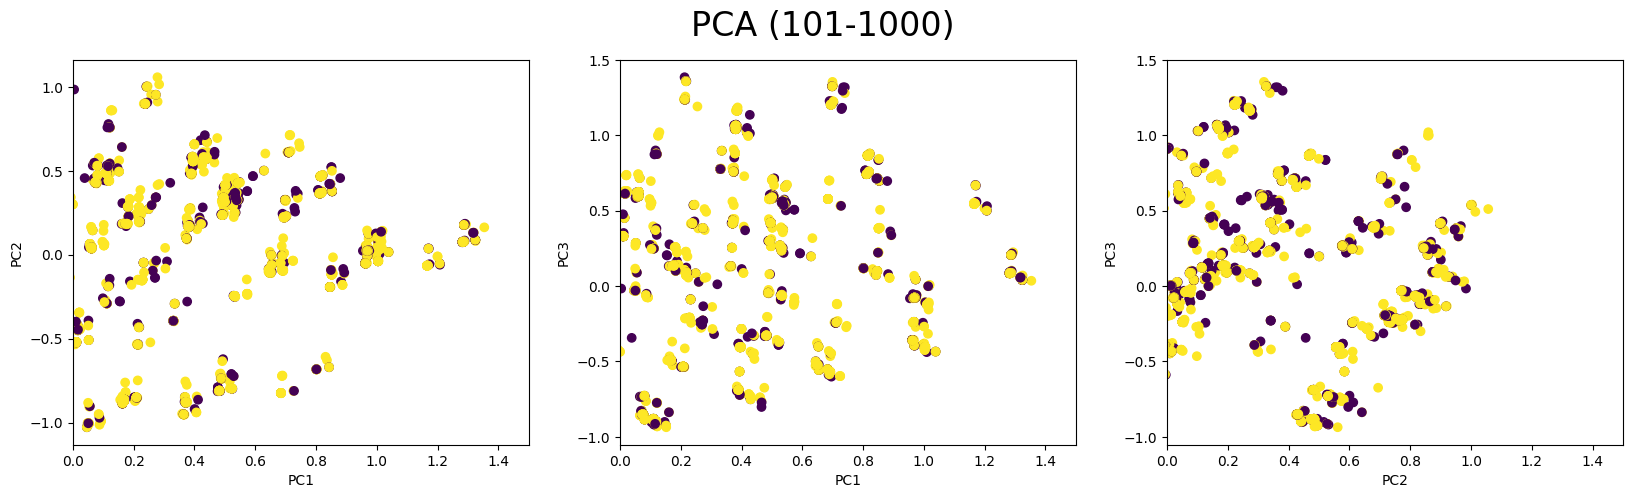

In [13]:
fig, ax = plt.subplots(figsize = (20, 5), nrows = 1, ncols = 3)

ax[0].scatter(ps[:, 0], ps[:, 1], c = d['Review Class'])
ax[0].set_xlim(0,1.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].scatter(ps[:, 0], ps[:, 2], c = d['Review Class'])
ax[1].set_xlim(0,1.5)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

ax[2].scatter(ps[:, 1], ps[:, 2], c = d['Review Class'])
ax[2].set_xlim(0,1.5)
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')

fig.suptitle('PCA (101-1000)', fontsize = 24)

plt.show()

In [14]:
print('spectral')
spectral(d, train_cols)

print('kmeans')
kmeans(d, train_cols)

print('rf')
rf = rfm(d, train_cols)

print('xgb')
xgbc = xgbm(d, train_cols)

spectral
Accuracy: 45.33%
[[1277  764]
 [3330 2118]]
Precision 0: 62.57%
Precision 1: 38.88%
Recall 0: 27.72%
Recall 1: 73.49%


kmeans
Accuracy: 44.18%
[[1022 1019]
 [3161 2287]]
Precision 0: 50.07%
Precision 1: 41.98%
Recall 0: 24.43%
Recall 1: 69.18%


rf


C:\Users\Almat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 68.94%
[[ 101  525]
 [ 173 1448]]
Precision 0: 16.13%
Precision 1: 89.33%
Recall 0: 36.86%
Recall 1: 73.39%


xgb
Accuracy: 64.13%
[[ 261  365]
 [ 441 1180]]
Precision 0: 41.69%
Precision 1: 72.79%
Recall 0: 37.18%
Recall 1: 76.38%




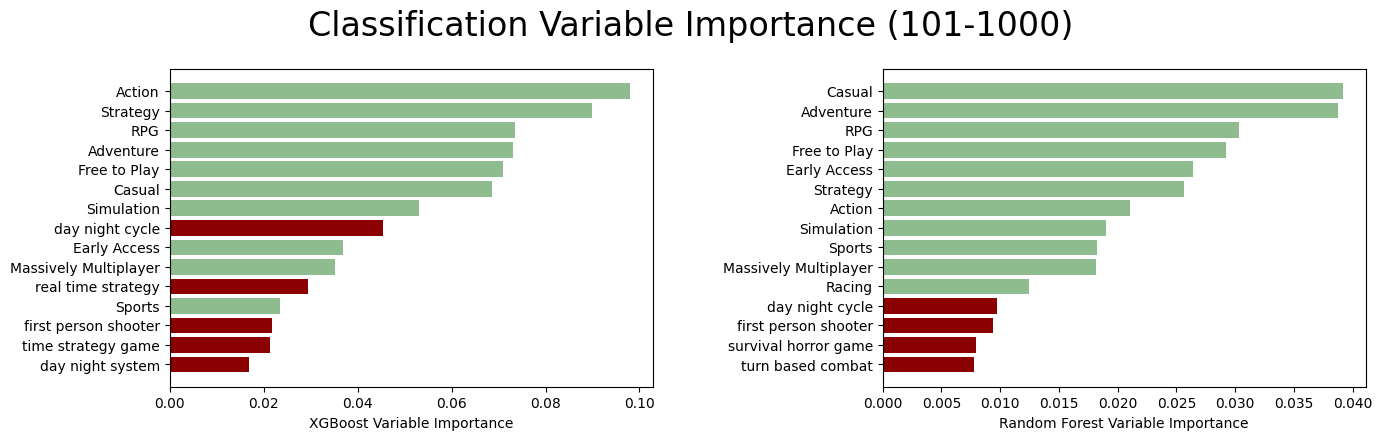

In [15]:
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 2)

# xgb
sorted_idx = (xgbc.feature_importances_).argsort()[-15:]

fi = xgbc.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[0].barh(fs, fi, color = cs)
ax[0].set_xlabel("XGBoost Variable Importance")

# rf
sorted_idx = (rf.feature_importances_).argsort()[-15:]

fi = rf.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[1].barh(fs, fi, color = cs)
ax[1].set_xlabel("Random Forest Variable Importance")

fig.tight_layout(pad = 5)
fig.suptitle('Classification Variable Importance (101-1000)', fontsize = 24)
plt.savefig('vi-101-1000.png')
plt.show()

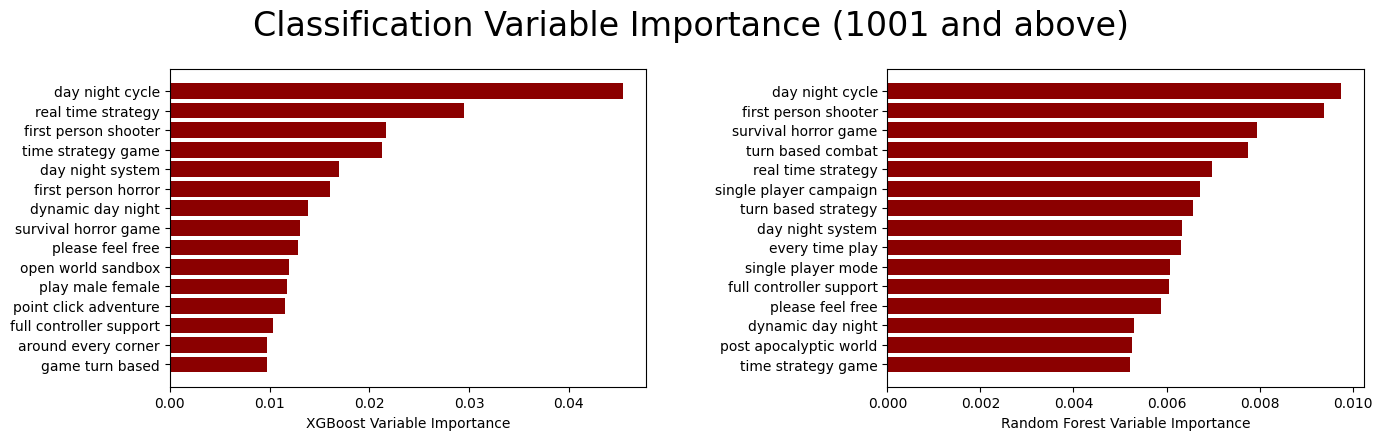

In [16]:
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 2)

# xgb
sorted_idx = (xgbc.feature_importances_).argsort()

fi = xgbc.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]

fi = fi[np.where(np.isin(fs, train_cols[26:]))][-15:]
fs = fs[np.where(np.isin(fs, train_cols[26:]))][-15:]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[0].barh(fs, fi, color = cs)
ax[0].set_xlabel("XGBoost Variable Importance")

# rf
sorted_idx = (rf.feature_importances_).argsort()

fi = rf.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]

fi = fi[np.where(np.isin(fs, train_cols[26:]))][-15:]
fs = fs[np.where(np.isin(fs, train_cols[26:]))][-15:]

cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[1].barh(fs, fi, color = cs)
ax[1].set_xlabel("Random Forest Variable Importance")

fig.tight_layout(pad = 5)
fig.suptitle('Classification Variable Importance (1001 and above)', fontsize = 24)
plt.savefig('vi-1001.png')
plt.show()

# 1000 and more

In [17]:
d = load_data(1001, None)
d['CLEAN About the game'] = clean_text(d)
d_tfidf = tfidf(d['CLEAN About the game'], (3,3), 0.001)

d = d.join(d_tfidf)

train_cols = [col for col in d.columns[20:] if col != 'CLEAN About the game']

In [18]:
top_words(d)

      Review Class                  word     tfidf
1242             0    single player mode  0.013517
505              0  first person shooter  0.013433
913              0       new explore new  0.010201
989              0    open world sandbox  0.009741
444              0     fast paced action  0.009231
      Review Class                     word     tfidf
2085             1     first person shooter  0.007817
2685             1    point click adventure  0.007252
3019             1        turn based combat  0.006466
2735             1       real time strategy  0.006335
2117             1  full controller support  0.006143


In [19]:
print('n = ', len(d), ' with ', np.around(d['Review Class'].value_counts()[1]/len(d) * 100, 1), '\% Positive class', sep = "")

n = 2823 with 89.8\% Positive class


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 15)
pca.fit(d[train_cols])

ps = pca.transform(d[train_cols])

print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.6989307391722842
[0.14231345 0.1128335  0.10119609 0.07658232 0.07028448 0.05667364
 0.05066622 0.03766    0.0188134  0.01426899 0.00912735 0.00226686
 0.00221862 0.00217661 0.00184922]


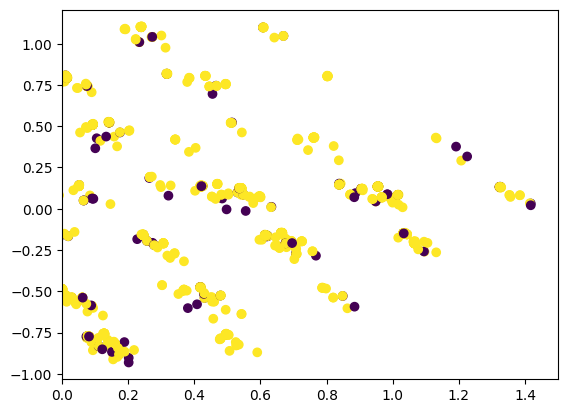

In [21]:
plt.scatter(ps[:, 0], ps[:, 1], c = d['Review Class'])
plt.xlim(0,1.5)
plt.show()

In [22]:
print('spectral')
spectral(d, train_cols)

print('kmeans')
kmeans(d, train_cols)

print('rf')
rf = rfm(d, train_cols)

print('xgb')
xgbc = xgbm(d, train_cols)

spectral
Accuracy: 66.10%
[[  88  199]
 [ 758 1778]]
Precision 0: 30.66%
Precision 1: 70.11%
Recall 0: 10.40%
Recall 1: 89.93%


kmeans
Accuracy: 46.72%
[[ 147  140]
 [1364 1172]]
Precision 0: 51.22%
Precision 1: 46.21%
Recall 0: 9.73%
Recall 1: 89.33%


rf


C:\Users\Almat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 87.96%
[[  4  93]
 [  9 741]]
Precision 0: 4.12%
Precision 1: 98.80%
Recall 0: 30.77%
Recall 1: 88.85%


xgb
Accuracy: 77.10%
[[ 37  60]
 [134 616]]
Precision 0: 38.14%
Precision 1: 82.13%
Recall 0: 21.64%
Recall 1: 91.12%




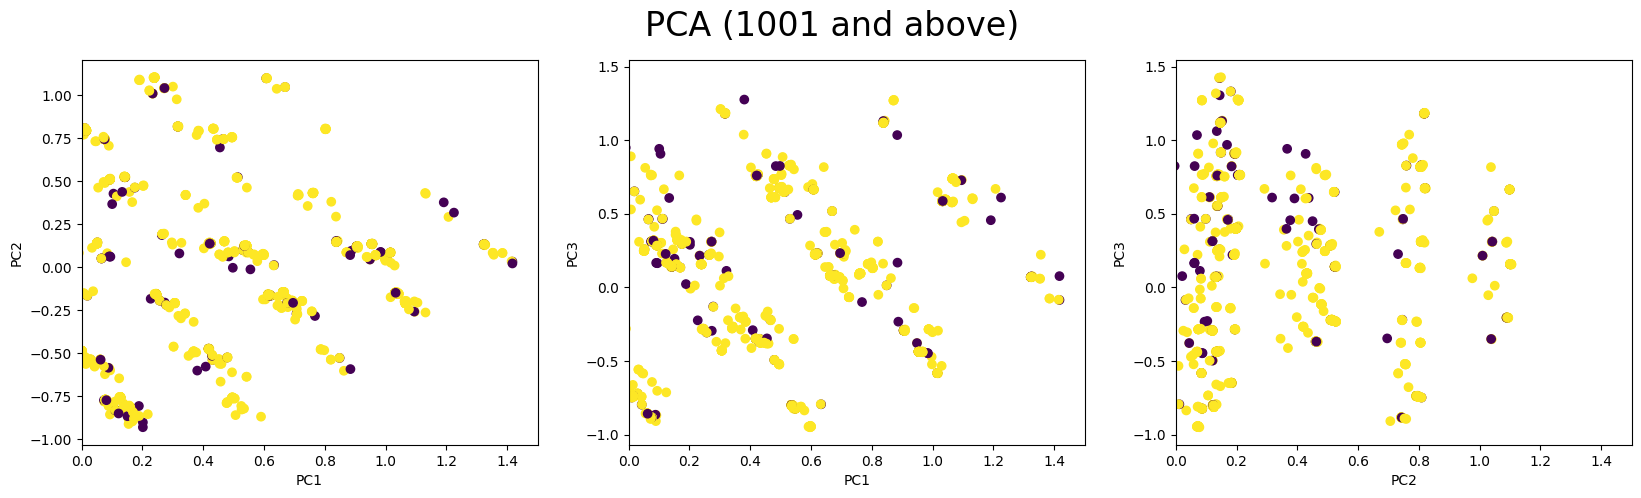

In [23]:
fig, ax = plt.subplots(figsize = (20, 5), nrows = 1, ncols = 3)

ax[0].scatter(ps[:, 0], ps[:, 1], c = d['Review Class'])
ax[0].set_xlim(0,1.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].scatter(ps[:, 0], ps[:, 2], c = d['Review Class'])
ax[1].set_xlim(0,1.5)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

ax[2].scatter(ps[:, 1], ps[:, 2], c = d['Review Class'])
ax[2].set_xlim(0,1.5)
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')

fig.suptitle('PCA (1001 and above)', fontsize = 24)
plt.show()

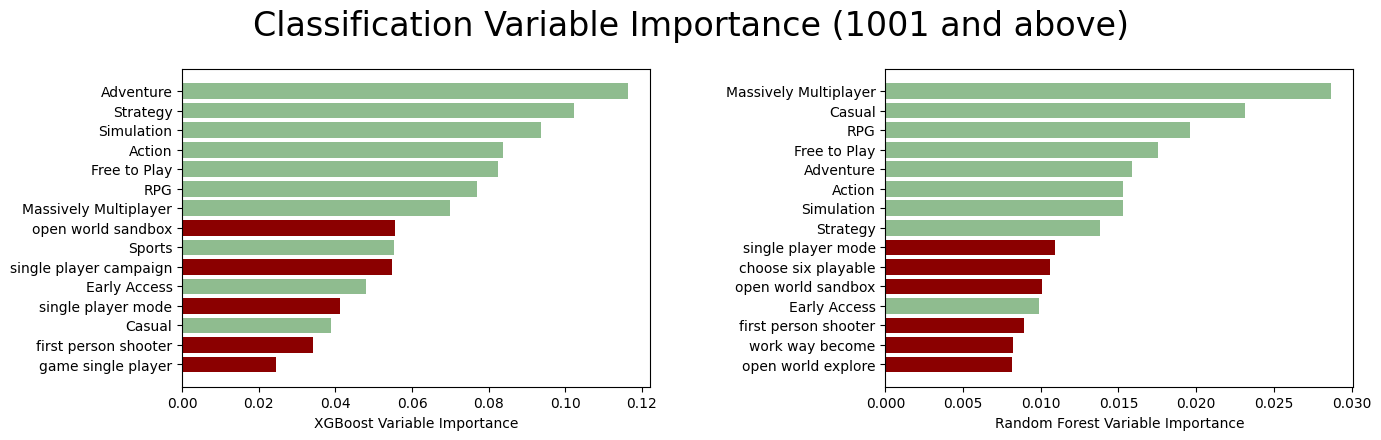

In [24]:
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 2)

# xgb
sorted_idx = (xgbc.feature_importances_).argsort()[-15:]

fi = xgbc.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[0].barh(fs, fi, color = cs)
ax[0].set_xlabel("XGBoost Variable Importance")

# rf
sorted_idx = (rf.feature_importances_).argsort()[-15:]

fi = rf.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[1].barh(fs, fi, color = cs)
ax[1].set_xlabel("Random Forest Variable Importance")

fig.tight_layout(pad = 5)
fig.suptitle('Classification Variable Importance (1001 and above)', fontsize = 24)
plt.savefig('vi-1001.png')
plt.show()

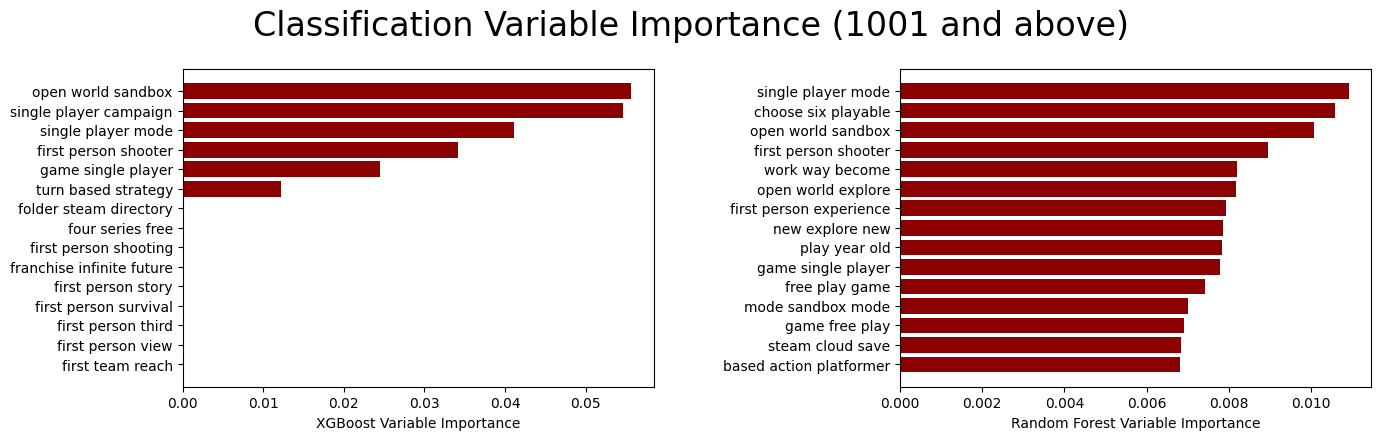

In [25]:
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 2)

# xgb
sorted_idx = (xgbc.feature_importances_).argsort()

fi = xgbc.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]

fi = fi[np.where(np.isin(fs, train_cols[26:]))][-15:]
fs = fs[np.where(np.isin(fs, train_cols[26:]))][-15:]
cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[0].barh(fs, fi, color = cs)
ax[0].set_xlabel("XGBoost Variable Importance")

# rf
sorted_idx = (rf.feature_importances_).argsort()

fi = rf.feature_importances_[sorted_idx]
fs = np.array(train_cols)[sorted_idx]

fi = fi[np.where(np.isin(fs, train_cols[26:]))][-15:]
fs = fs[np.where(np.isin(fs, train_cols[26:]))][-15:]

cs = np.isin(fs, train_cols[26:]).astype(int)
cs = np.where(cs == 1, 'darkred', 'darkseagreen')

ax[1].barh(fs, fi, color = cs)
ax[1].set_xlabel("Random Forest Variable Importance")

fig.tight_layout(pad = 5)
fig.suptitle('Classification Variable Importance (1001 and above)', fontsize = 24)
plt.savefig('vi-1001.png')
plt.show()